# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.

* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.

* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from urllib.error import HTTPError
import openweathermapy as ow
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
os.makedirs(os.path.join('output_data'),exist_ok=True)
output_data_file = os.path.join("output_data","cities.csv")
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [67]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# mapped = set(lat_lngs)
# print (mapped)

In [68]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [69]:
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key 
# create setting and desired_keys
setting = {'units':'Imperial','appid':api_key}
desired_keys = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']

In [80]:
#set up lists to hold response info
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
lat =[]
lng =[]
cities_list = []

# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("-------------------------")
counter = 1 
set_count = 1
for i, city in enumerate(cities): 
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        counter = 0
    city_url = base_url + '&q=' + city.replace(' ','+')
    print("Processing Record %s of Set %s | %s" % (counter, set_count, city))
    counter += 1

    try:
        city_data = ow.get_current(city,**setting)
        cl,ct,dt,hm,mt,ws,lt,ln = city_data(*desired_keys)
        cloudiness.append(cl)
        country.append(ct)
        date.append(dt)
        humidity.append(hm)
        max_temp.append(mt)
        wind_speed.append(ws)
        lat.append(lt)
        lng.append(ln)
        cities_list.append(city)
    except HTTPError:
        print('City not found. skipping...')
        pass
print('---------------------')
print('Data Retrieval Complete')


Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | deputatskiy
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | mathathane
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | kruisfontein
Processing Record 10 of Set 1 | vardo
Processing Record 11 of Set 1 | san patricio
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | acapulco
Processing Record 15 of Set 1 | brae
Processing Record 16 of Set 1 | hobyo
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | chapais
Processing Record 20 of Set 1 | homa bay
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | tsumeb
Processing Record 23 of Set 1 | grand river south east

Processing Record 34 of Set 4 | bathsheba
Processing Record 35 of Set 4 | vaitupu
City not found. skipping...
Processing Record 36 of Set 4 | bokspits
City not found. skipping...
Processing Record 37 of Set 4 | ketchikan
Processing Record 38 of Set 4 | ust-tsilma
Processing Record 39 of Set 4 | tual
Processing Record 40 of Set 4 | kaitangata
Processing Record 41 of Set 4 | cherskiy
Processing Record 42 of Set 4 | port blair
Processing Record 43 of Set 4 | east stroudsburg
Processing Record 44 of Set 4 | kungurtug
Processing Record 45 of Set 4 | brewster
Processing Record 46 of Set 4 | cortland
Processing Record 47 of Set 4 | ayagoz
Processing Record 48 of Set 4 | ullapool
Processing Record 49 of Set 4 | grand-lahou
Processing Record 0 of Set 5 | codrington
Processing Record 1 of Set 5 | constitucion
Processing Record 2 of Set 5 | nhulunbuy
Processing Record 3 of Set 5 | columbia
Processing Record 4 of Set 5 | harper
Processing Record 5 of Set 5 | charagua
Processing Record 6 of Set 5 |

Processing Record 18 of Set 8 | trelew
Processing Record 19 of Set 8 | manturovo
Processing Record 20 of Set 8 | yar-sale
Processing Record 21 of Set 8 | leningradskiy
Processing Record 22 of Set 8 | reconquista
Processing Record 23 of Set 8 | pangnirtung
Processing Record 24 of Set 8 | vostok
Processing Record 25 of Set 8 | matay
Processing Record 26 of Set 8 | taua
Processing Record 27 of Set 8 | aykhal
Processing Record 28 of Set 8 | georgetown
Processing Record 29 of Set 8 | northam
Processing Record 30 of Set 8 | dzaoudzi
Processing Record 31 of Set 8 | izhma
Processing Record 32 of Set 8 | margate
Processing Record 33 of Set 8 | borogontsy
Processing Record 34 of Set 8 | yumen
Processing Record 35 of Set 8 | lebu
Processing Record 36 of Set 8 | altamira
Processing Record 37 of Set 8 | middle island
Processing Record 38 of Set 8 | ancud
Processing Record 39 of Set 8 | severomuysk
Processing Record 40 of Set 8 | artyom
Processing Record 41 of Set 8 | dolores
Processing Record 42 of

Processing Record 4 of Set 12 | carbonia
Processing Record 5 of Set 12 | zyryanka
Processing Record 6 of Set 12 | zhicheng
Processing Record 7 of Set 12 | sioux lookout
Processing Record 8 of Set 12 | thai nguyen
Processing Record 9 of Set 12 | umzimvubu
City not found. skipping...
Processing Record 10 of Set 12 | dakar
Processing Record 11 of Set 12 | lashio
Processing Record 12 of Set 12 | portobelo
Processing Record 13 of Set 12 | padang
Processing Record 14 of Set 12 | salinopolis
Processing Record 15 of Set 12 | segezha
Processing Record 16 of Set 12 | cuamba
Processing Record 17 of Set 12 | raga
City not found. skipping...
Processing Record 18 of Set 12 | san mateo
Processing Record 19 of Set 12 | msanga
Processing Record 20 of Set 12 | adre
Processing Record 21 of Set 12 | carrollton
Processing Record 22 of Set 12 | veraval
Processing Record 23 of Set 12 | vestmanna
Processing Record 24 of Set 12 | gamba
Processing Record 25 of Set 12 | trinidad
Processing Record 26 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [81]:
city_weather_df = pd.DataFrame({
     'City':cities_list,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temp':max_temp,
     'Wind Speed':wind_speed,
     })
city_weather_df.to_csv(output_data_file)
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tuktoyaktuk,75,CA,1554087600,85,69.44,-133.03,15.80,17.22
1,rikitea,36,PF,1554090102,100,-23.12,-134.97,76.79,16.82
2,deputatskiy,32,RU,1554090146,90,69.30,139.90,19.01,3.74
3,komsomolskiy,20,RU,1554090147,83,67.55,63.78,20.18,15.26
4,mathathane,0,BW,1554090147,87,-22.27,28.75,61.58,2.84


In [82]:
city_weather_df.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [83]:
def plot_lat(y,y_label):
    lat_y = plt.scatter(city_weather_df['Lat'],city_weather_df[y],alpha=0.75,edgecolors='black')
    plt.title(f"City Latitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Latitude') 
    plt.ylabel(y_label)
    plt.xlim(-80,100)
    plt.ylim(min(city_weather_df[y])-20,max(city_weather_df[y])+20)
    plt.grid()
    plt.savefig(os.path.join('output_data',f'Latitude_vs_{y}.png'))

#### Latitude vs. Temperature Plot

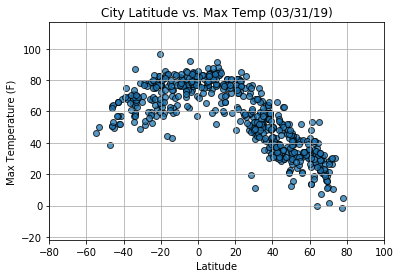

In [84]:
lat_temp = plot_lat(y='Max Temp',y_label='Max Temperature (F)')
lat_temp

#### Latitude vs. Humidity Plot

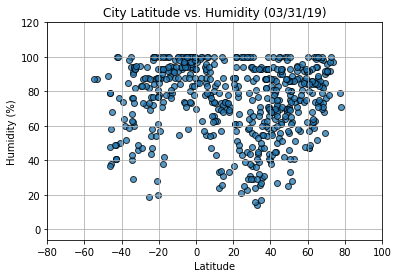

In [85]:
lat_humidity = plot_lat(y='Humidity',y_label='Humidity (%)')
lat_humidity

#### Latitude vs. Cloudiness Plot

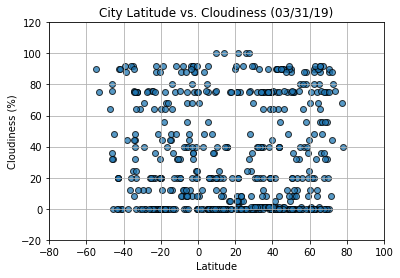

In [86]:
lat_cloudiness = plot_lat(y='Cloudiness', y_label= 'Cloudiness (%)')
lat_cloudiness

#### Latitude vs. Wind Speed Plot

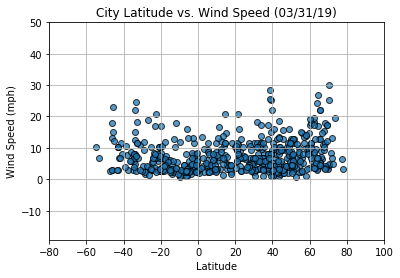

In [87]:
lat_wind = plot_lat(y='Wind Speed',y_label='Wind Speed (mph)')
lat_wind